C:\Users\sagni\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


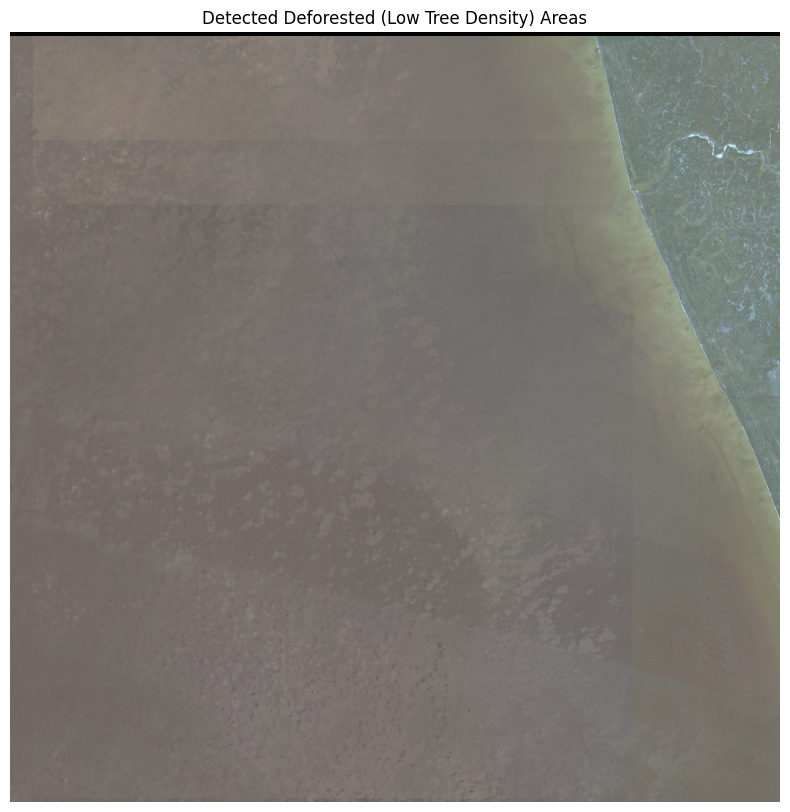

In [1]:
import matplotlib.pyplot as plt
import rasterio
import numpy as np
from rasterio.plot import reshape_as_image
from rasterio.features import shapes

# Load RGB image (B4 = Red, B3 = Green, B2 = Blue for Sentinel-2)
tif_path = r"C:\Users\sagni\Downloads\Deforestation Detection\Western_Ghats_After_2022-0000000000-0000011776.tif"

with rasterio.open(tif_path) as src:
    red = src.read(3).astype(np.float32)   # B4
    green = src.read(2).astype(np.float32) # B3
    blue = src.read(1).astype(np.float32)  # B2
    transform = src.transform

# Stack into RGB image
rgb = np.stack([red, green, blue], axis=-1)

# Clip values between 0 and 3000 (Sentinel-2 reflectance range)
rgb = np.clip(rgb, 0, 3000)

# Normalize to [0, 1] for display
rgb_norm = rgb / 3000.0

# Load deforestation mask (generated earlier)
deforestation_mask_path = "deforestation_mask.tif"
with rasterio.open(deforestation_mask_path) as mask_src:
    mask = mask_src.read(1).astype(np.uint8)

# Show RGB + overlay red where forest is sparse
plt.figure(figsize=(10, 10))
plt.imshow(rgb_norm)
plt.imshow(np.ma.masked_where(mask == 0, mask), cmap='Reds', alpha=0.5)
plt.title("Detected Deforested (Low Tree Density) Areas")
plt.axis('off')
plt.show()
